In [230]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import fitutils as fu

# Données  brutes

In [231]:
# Echelles des posititons et des temps

echpos10 = 28.85/(759*100)
echpos10 = 28.85/(759*100)
echpos11 = 28.85/(778*100)
echpos12 = 28.85/(749*100)
echpos13 = 28.85/(774*100)
echpos14 = 28.85/(774*100)
echpos15 = 28.85/(802*100)
echpos16 = 28.85/(762*100)
echpos17 = 28.85/(802*100)

echtps1 = 108/645
echtps6 = 112/672
echtps8 = 119/716
echtps10 = 160/956
echtps11 = 152/909
echtps12 = 130/781
echtps13 = 184/1101
echtps14 = 144/864
echtps15 = 157/762
echtps16 = 112/710
echtps17 = 167/699

In [232]:
# Definition des fonctions utilisées
def dr10(tab):
    ind = np.where(tab[:, 0] > 830)[0]
    if len(ind) == 0:
        return tab
    nv = tab[ind]
    lenligne = len(ind)
    for i in range(lenligne) :
        tab[ind[i], 1] += 42
    return tab

def dr16(tab):
    ind = np.where(tab[:, 0] > 830)[0]
    if len(ind) == 0:
        return tab
    nv = tab[ind]
    lenligne = len(ind)
    for i in range(lenligne) :
        tab[ind[i], 1] += 10
    return tab

def enlev(tableau1, tableau2):
    set_tableau1 = {tuple(coord) for coord in tableau1}
    set_tableau2 = {tuple(coord) for coord in tableau2}
    set_resultat = set_tableau1 - set_tableau2
    resultat = np.array(list(set_resultat))
    return resultat

def moy(positions, temps):
    if len(positions) != len(temps):
        raise ValueError("Les listes 'positions' et 'temps' doivent être de même taille.")
    temps_positions = {}   
    for pos, t in zip(positions, temps):
        if t in temps_positions:
            temps_positions[t]['somme_positions'] += pos
            temps_positions[t]['count'] += 1
        else:
            temps_positions[t] = {'somme_positions': pos, 'count': 1}    
    nv_temps = []
    pos_moy = []   
    for t in sorted(temps_positions):
        moyenne = temps_positions[t]['somme_positions'] / temps_positions[t]['count']
        nv_temps.append(t)
        pos_moy.append(moyenne)  
    return nv_temps, pos_moy

def sep(position, temps, ecart_max=10):
    #sorted_data = sorted(zip(tempsc, positionc))
    #tempsb, positionb = zip(*sorted_data)
    #temps, position = moy(positionb, tempsb)
    positions_sep = []
    temps_sep = []
    temp_positions = [position[0]]
    temp_temps = [temps[0]]
    for i in range(1, len(position)):
        if np.abs(position[i] - position[i-1]) > ecart_max:
            positions_sep.append(temp_positions)
            temps_sep.append(temp_temps)
            temp_positions = [position[i]]
            temp_temps = [temps[i]]
        else:
            temp_positions.append(position[i])
            temp_temps.append(temps[i])
    positions_sep.append(temp_positions)
    temps_sep.append(temp_temps)
    return positions_sep, temps_sep

def fe(x, a, b):
    return a*np.exp(-x/b)


In [233]:
# Raie 0 noire
rai0 = (34 + 0)/2
urai0 =(34 - 0)/np.sqrt(12)
#print(rai0, urai0)

df010 = pd.read_csv('Mesure_drain/Raie0/Results010.csv')
array010 = df010.to_numpy()
array010b = dr10(array010)
tab010 = array010[:-1 , 5:]
pos010 = tab010[:, 1]*echpos10
tps010 = tab010[:, 0]*echtps10

df011 = pd.read_csv('Mesure_drain/Raie0/Results011.csv')
array011 = df011.to_numpy()
tab011 = array011[:, 5:7] 
pos011 = tab011[:, 1]*echpos11
tps011 = tab011[:, 0]*echtps11

df012 = pd.read_csv('Mesure_drain/Raie0/Results012.csv')
array012 = df012.to_numpy()
tab012 = array012[:, 5:7]
pos012 = tab012[:, 1]*echpos12
tps012 = tab012[:, 0]*echtps12

df113 = pd.read_csv('Mesure_drain/Raie1/Results113.csv')
array113 = df113.to_numpy()
tab113 = array113[:, 5:7]
df013 = pd.read_csv('Mesure_drain/Raie0/Results013.csv')
array013 = df013.to_numpy()
tab013 = array013[:, 5:7]
tab013b = enlev(tab013, tab113)
pos013 = tab013b[:, 1]*echpos13
tps013 = tab013b[:, 0]*echtps13

df114 = pd.read_csv('Mesure_drain/Raie1/Results114.csv')
array114 = df114.to_numpy()
tab114 = array114[:, 5:7]
df014 = pd.read_csv('Mesure_drain/Raie0/Results014.csv')
array014 = df014.to_numpy()
tab014 = array014[:, 5:7]
tab014b = enlev(tab014, tab114)
pos014 = tab014b[:, 1]*echpos14
tps014 = tab014b[:, 0]*echtps14

df015 = pd.read_csv('Mesure_drain/Raie0/Results015.csv')
array015 = df015.to_numpy()
tab015 = array015[:, 5:7]
pos015 = tab015[:, 1]*echpos15
tps015 = tab015[:, 0]*echtps15

df016 = pd.read_csv('Mesure_drain/Raie0/Results016.csv')
array016 = df016.to_numpy()
array016b = dr10(array016)
tab016 = array016[:, 5:7]
pos016 = tab016[:, 1]*echpos16
tps016 = tab016[:, 0]*echtps16

df017 = pd.read_csv('Mesure_drain/Raie0/Results017.csv')
array017 = df017.to_numpy()
tab017 = array017[:, 5:7]
pos017 = tab017[:, 1]*echpos17
tps017 = tab017[:, 0]*echtps17

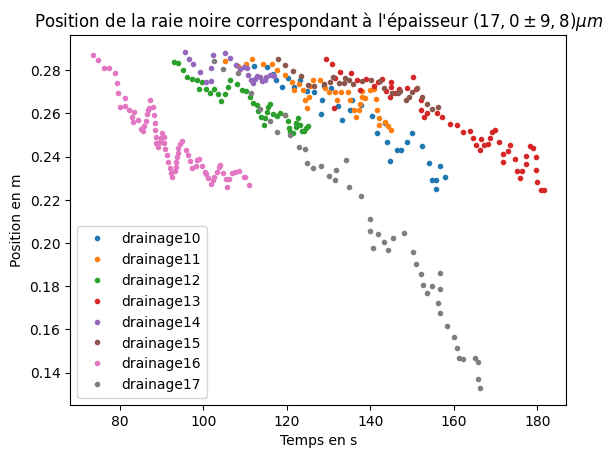

In [234]:
plt.figure()
plt.plot(tps010, pos010, '.', label='drainage10')
plt.plot(tps011, pos011, '.', label='drainage11')
plt.plot(tps012, pos012, '.', label='drainage12')
plt.plot(tps013, pos013, '.', label='drainage13')
plt.plot(tps014, pos014, '.', label='drainage14')
plt.plot(tps015, pos015, '.', label='drainage15')
plt.plot(tps016, pos016, '.', label='drainage16')
plt.plot(tps017, pos017, '.', label='drainage17')
plt.xlabel('Temps en s')
plt.ylabel('Position en m')
plt.title(r"Position de la raie noire correspondant à l'épaisseur $(17,0 \pm 9,8) \mu m$")
plt.legend()
plt.show()

In [235]:
# Raie 1 Violette
rai1 = (230 + 196)/2
urai1 =(230 - 196)/np.sqrt(12)
#print(rai1, urai1)

df110 = pd.read_csv('Mesure_drain/Raie1/Results110.csv')
array110 = df110.to_numpy()
tab110 = array110[:-1 , 5:7]
tab110b = dr10(tab110)
pos110 = tab110[:, 1]*echpos10
tps110 = tab110[:, 0]*echtps10

df111 = pd.read_csv('Mesure_drain/Raie1/Results111.csv')
array111 = df111.to_numpy()
tab111 = array111[:, 5:7]
pos111 = tab111[:, 1]*echpos11
tps111 = tab111[:, 0]*echtps11

df112 = pd.read_csv('Mesure_drain/Raie1/Results112.csv')
array112 = df112.to_numpy()
tab112 = array112[:, 5:7]
pos112 = tab112[:, 1]*echpos12
tps112 = tab112[:, 0]*echtps12

df113 = pd.read_csv('Mesure_drain/Raie1/Results113.csv')
array113 = df113.to_numpy()
tab113 = array113[:, 5:7]
pos113 = tab113[:, 1]*echpos13
tps113 = tab113[:, 0]*echtps13

df114 = pd.read_csv('Mesure_drain/Raie1/Results114.csv')
array114 = df114.to_numpy()
tab114 = array114[:, 5:7]
pos114 = tab114[:, 1]*echpos14
tps114 = tab114[:, 0]*echtps14

df115 = pd.read_csv('Mesure_drain/Raie1/Results115.csv')
array115 = df115.to_numpy()
tab115 = array115[:, 5:7]
pos115 = tab115[:, 1]*echpos15
tps115 = tab115[:, 0]*echtps15

df117 = pd.read_csv('Mesure_drain/Raie1/Results117.csv')
array117 = df117.to_numpy()
tab117 = array117[:, 5:7]
pos117 = tab117[:, 1]*echpos17
tps117 = tab117[:, 0]*echtps17

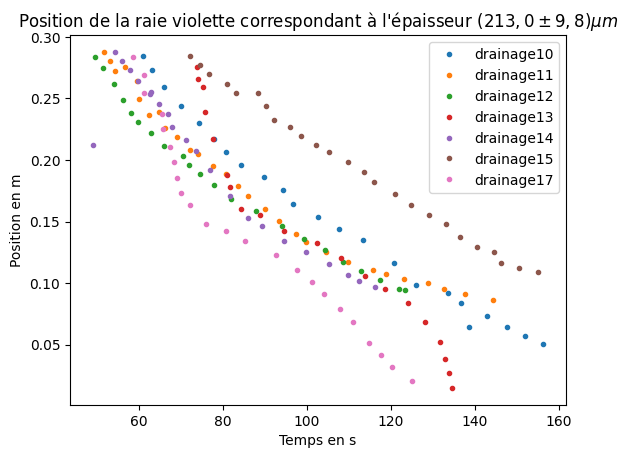

In [236]:
plt.figure()
plt.plot(tps110, pos110, '.', label='drainage10')
plt.plot(tps111, pos111, '.', label='drainage11')
plt.plot(tps112, pos112, '.', label='drainage12')
plt.plot(tps113, pos113, '.', label='drainage13')
plt.plot(tps114, pos114, '.', label='drainage14')
plt.plot(tps115, pos115, '.', label='drainage15')
plt.plot(tps117, pos117, '.', label='drainage17')
plt.xlabel('Temps en s')
plt.ylabel('Position en m')
plt.title(r"Position de la raie violette correspondant à l'épaisseur $(213,0 \pm 9,8) \mu m$")
plt.legend()
plt.show()

In [237]:
# Raie 2 Bleue
rai2 = (464 + 404)/2
urai2 =(464 - 404)/np.sqrt(12)
#print(rai2, urai2)

df210 = pd.read_csv('Mesure_drain/Raie2/Results210.csv')
array210 = df210.to_numpy()
tab210 = array210[:-1 , 5:7]
tab210b = dr10(tab210)
pos210 = tab210[:, 1]*echpos10
tps210 = tab210[:, 0]*echtps10

df211 = pd.read_csv('Mesure_drain/Raie2/Results211.csv')
array211 = df211.to_numpy()
tab211 = array211[:, 5:7]
pos211 = tab211[:, 1]*echpos11
tps211 = tab211[:, 0]*echtps11

df212 = pd.read_csv('Mesure_drain/Raie2/Results212.csv')
array212 = df212.to_numpy()
tab212 = array212[:, 5:7]
pos212 = tab212[:, 1]*echpos12
tps212 = tab212[:, 0]*echtps12

df213 = pd.read_csv('Mesure_drain/Raie2/Results213.csv')
array213 = df213.to_numpy()
tab213 = array213[:, 5:7]
pos213 = tab213[:, 1]*echpos13
tps213 = tab213[:, 0]*echtps13

df214 = pd.read_csv('Mesure_drain/Raie2/Results214.csv')
array214 = df214.to_numpy()
tab214 = array214[:, 5:7]
pos214 = tab214[:, 1]*echpos14
tps214 = tab214[:, 0]*echtps14

df215 = pd.read_csv('Mesure_drain/Raie2/Results215.csv')
array215 = df215.to_numpy()
tab215 = array215[:, 5:7]  
pos215 = tab215[:, 1]*echpos15
tps215 = tab215[:, 0]*echtps15

df217 = pd.read_csv('Mesure_drain/Raie2/Results217.csv')
array217 = df217.to_numpy() 
tab217 = array217[:, 5:7]
pos217 = tab217[:, 1]*echpos17
tps217 = tab217[:, 0]*echtps17

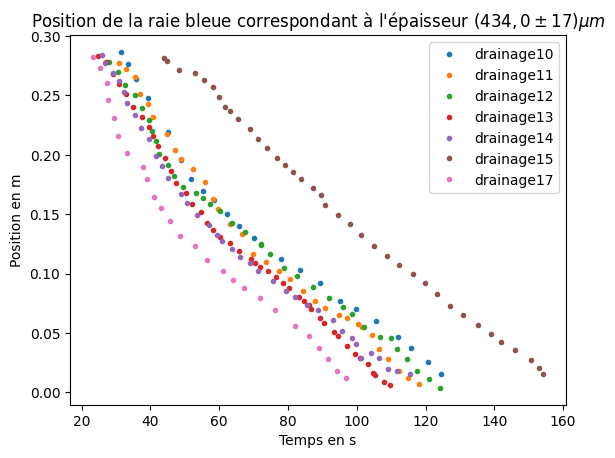

In [238]:
plt.figure()
plt.plot(tps210, pos210, '.', label='drainage10')
plt.plot(tps211, pos211, '.', label='drainage11')
plt.plot(tps212, pos212, '.', label='drainage12')
plt.plot(tps213, pos213, '.', label='drainage13')
plt.plot(tps214, pos214, '.', label='drainage14')
plt.plot(tps215, pos215, '.', label='drainage15')
plt.plot(tps217, pos217, '.', label='drainage17')
plt.xlabel('Temps en s')
plt.ylabel('Position en m')
plt.title(r"Position de la raie bleue correspondant à l'épaisseur $(434,0 \pm 17) \mu m$")
plt.legend()
plt.show()

In [239]:
# Raie 3 Rose
rai3 = (625 + 567)/2
urai3 =(625 - 567)/np.sqrt(12)
#print(rai3, urai3)

df310 = pd.read_csv('Mesure_drain/Raie3/Results310.csv') 
array310 = df310.to_numpy()
array310b = dr10(array310)
tab310 = array310[:-1 , 5:] 
pos310 = tab310[:, 1]*echpos10
tps310 = tab310[:, 0]*echtps10

df311 = pd.read_csv('Mesure_drain/Raie3/Results311.csv') 
array311 = df311.to_numpy()
tab311 = array311[:, 5:7] 
pos311 = tab311[:, 1]*echpos11
tps311 = tab311[:, 0]*echtps11

df312 = pd.read_csv('Mesure_drain/Raie3/Results312.csv')
array312 = df312.to_numpy()
tab312 = array312[:, 5:7]
pos312 = tab312[:, 1]*echpos12
tps312 = tab312[:, 0]*echtps12

df313 = pd.read_csv('Mesure_drain/Raie3/Results313.csv') 
array313 = df313.to_numpy()
tab313 = array313[:, 5:7]
pos313 = tab313[:, 1]*echpos13
tps313 = tab313[:, 0]*echtps13

df314 = pd.read_csv('Mesure_drain/Raie3/Results314.csv')
array314 = df314.to_numpy()
tab314 = array314[:, 5:7] 
pos314 = tab314[:, 1]*echpos14
tps314 = tab314[:, 0]*echtps14

df315 = pd.read_csv('Mesure_drain/Raie3/Results315.csv')
array315 = df315.to_numpy() 
tab315 = array315[:, 5:7]
pos315 = tab315[:, 1]*echpos15
tps315 = tab315[:, 0]*echtps15

df317 = pd.read_csv('Mesure_drain/Raie3/Results317.csv') 
array317 = df317.to_numpy()
tab317 = array317[:, 5:7] 
pos317 = tab317[:, 1]*echpos17
tps317 = tab317[:, 0]*echtps17

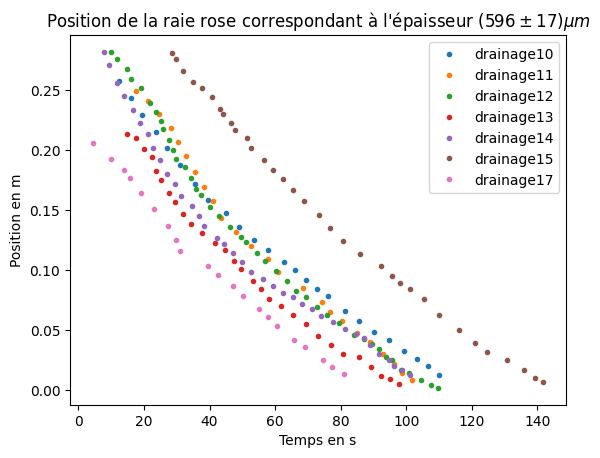

In [240]:
plt.figure()
plt.plot(tps310, pos310, '.', label='drainage10')
plt.plot(tps311, pos311, '.', label='drainage11')
plt.plot(tps312, pos312, '.', label='drainage12')
plt.plot(tps313, pos313, '.', label='drainage13')
plt.plot(tps314, pos314, '.', label='drainage14')
plt.plot(tps315, pos315, '.', label='drainage15')
plt.plot(tps317, pos317, '.', label='drainage17')
plt.xlabel('Temps en s')
plt.ylabel('Position en m')
plt.title(r"Position de la raie rose correspondant à l'épaisseur $(596 \pm 17) \mu m$")
plt.legend()
plt.show()

In [241]:
# Raie 4 Rose
rai4 = (853 + 776)/2
urai4 =(853 - 776)/np.sqrt(12)
#print(rai4, urai4)

df410 = pd.read_csv('Mesure_drain/Raie4/Results410.csv')
array410 = df410.to_numpy()
array410b = dr10(array410)
tab410 = array410[:-1 , 5:] 
pos410 = tab410[:, 1]*echpos10
tps410 = tab410[:, 0]*echtps10

df411 = pd.read_csv('Mesure_drain/Raie4/Results411.csv') 
array411 = df411.to_numpy()
tab411 = array411[:, 5:7]
pos411 = tab411[:, 1]*echpos11
tps411 = tab411[:, 0]*echtps11

df412 = pd.read_csv('Mesure_drain/Raie4/Results412.csv')
array412 = df412.to_numpy() 
tab412 = array412[:, 5:7] 
pos412 = tab412[:, 1]*echpos12
tps412 = tab412[:, 0]*echtps12

df413 = pd.read_csv('Mesure_drain/Raie4/Results413.csv') 
array413 = df413.to_numpy()
tab413 = array413[:, 5:7]
pos413 = tab413[:, 1]*echpos13
tps413 = tab413[:, 0]*echtps13

df414 = pd.read_csv('Mesure_drain/Raie4/Results414.csv')
array414 = df414.to_numpy()
tab414 = array414[:, 5:7]
pos414 = tab414[:, 1]*echpos14
tps414 = tab414[:, 0]*echtps14

df415 = pd.read_csv('Mesure_drain/Raie4/Results415.csv') 
array415 = df415.to_numpy()
tab415 = array415[:, 5:7]
pos415 = tab415[:, 1]*echpos15
tps415 = tab415[:, 0]*echtps15

df417 = pd.read_csv('Mesure_drain/Raie4/Results417.csv')
array417 = df417.to_numpy()
tab417 = array417[:, 5:7]
pos417 = tab417[:, 1]*echpos17
tps417 = tab417[:, 0]*echtps17

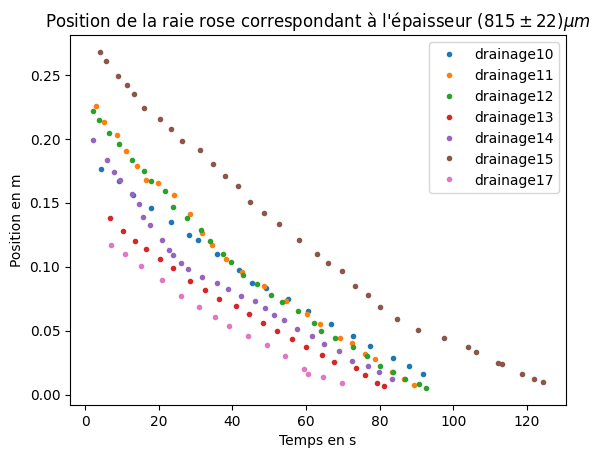

In [242]:
plt.figure()
plt.plot(tps410, pos410, '.', label='drainage10')
plt.plot(tps411, pos411, '.', label='drainage11')
plt.plot(tps412, pos412, '.', label='drainage12')
plt.plot(tps413, pos413, '.', label='drainage13')
plt.plot(tps414, pos414, '.', label='drainage14')
plt.plot(tps415, pos415, '.', label='drainage15')
plt.plot(tps417, pos417, '.', label='drainage17')
plt.xlabel('Temps en s')
plt.ylabel('Position en m')
plt.title(r"Position de la raie rose correspondant à l'épaisseur $(815 \pm 22) \mu m$")
plt.legend()
plt.show()

In [243]:
# Raie 5 Rose
rai5 = (1079 + 1009)/2
urai5 =(1079 - 1009)/np.sqrt(12)
#print(rai5, urai5)

df510 = pd.read_csv('Mesure_drain/Raie5/Results510.csv')
array510 = df510.to_numpy()
array510b = dr10(array510)
tab510 = array510[:-1 , 5:]
pos510 = tab510[:, 1]*echpos10
tps510 = tab510[:, 0]*echtps10

df511 = pd.read_csv('Mesure_drain/Raie5/Results511.csv')
array511 = df511.to_numpy()
tab511 = array511[:, 5:7]
pos511 = tab511[:, 1]*echpos11
tps511 = tab511[:, 0]*echtps11

df512 = pd.read_csv('Mesure_drain/Raie5/Results512.csv') 
array512 = df512.to_numpy()
tab512 = array512[:, 5:7]
pos512 = tab512[:, 1]*echpos12
tps512 = tab512[:, 0]*echtps12

df513 = pd.read_csv('Mesure_drain/Raie5/Results513.csv') 
array513 = df513.to_numpy()
tab513 = array513[:, 5:7]
pos513 = tab513[:, 1]*echpos13
tps513 = tab513[:, 0]*echtps13

df514 = pd.read_csv('Mesure_drain/Raie5/Results514.csv')
array514 = df514.to_numpy()
tab514 = array514[:, 5:7]
pos514 = tab514[:, 1]*echpos14
tps514 = tab514[:, 0]*echtps14

df515 = pd.read_csv('Mesure_drain/Raie5/Results515.csv')
array515 = df515.to_numpy()
tab515 = array515[:, 5:7]
pos515 = tab515[:, 1]*echpos15
tps515 = tab515[:, 0]*echtps15

df517 = pd.read_csv('Mesure_drain/Raie5/Results517.csv')
array517 = df517.to_numpy()
tab517 = array517[:, 5:7]
pos517 = tab517[:, 1]*echpos17
tps517 = tab517[:, 0]*echtps17

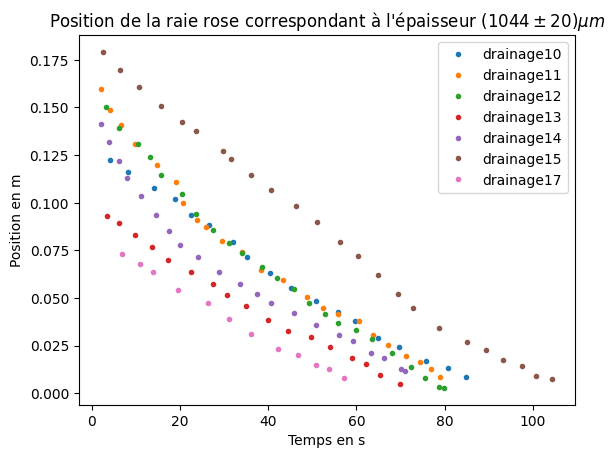

In [244]:
plt.figure()
plt.plot(tps510, pos510, '.', label='drainage10')
plt.plot(tps511, pos511, '.', label='drainage11')
plt.plot(tps512, pos512, '.', label='drainage12')
plt.plot(tps513, pos513, '.', label='drainage13')
plt.plot(tps514, pos514, '.', label='drainage14')
plt.plot(tps515, pos515, '.', label='drainage15')
plt.plot(tps517, pos517, '.', label='drainage17')
plt.xlabel('Temps en s')
plt.ylabel('Position en m')
plt.title(r"Position de la raie rose correspondant à l'épaisseur $(1044 \pm 20) \mu m$")
plt.legend()
plt.show()

In [245]:
# Raie 6 Rose
rai6 = (1299 + 1228)/2
urai6 = (1299 - 1228)/np.sqrt(12)
#print(rai3, urai3)

df610 = pd.read_csv('Mesure_drain/Raie6/Results610.csv')
array610 = df610.to_numpy()
array610b = dr10(array610)
tab610 = array610[:-1 , 5:]
pos610 = tab610[:, 1]*echpos10
tps610 = tab610[:, 0]*echtps10

df611 = pd.read_csv('Mesure_drain/Raie6/Results611.csv')
array611 = df611.to_numpy()
tab611 = array611[:, 5:7]
tps611 = tab611[:, 0]*echtps11
pos611 = tab611[:, 1]*echpos11


df612 = pd.read_csv('Mesure_drain/Raie6/Results612.csv') 
array612 = df612.to_numpy() 
tab612 = array612[:, 5:7]
pos612 = tab612[:, 1]*echpos12
tps612 = tab612[:, 0]*echtps12

df613 = pd.read_csv('Mesure_drain/Raie6/Results613.csv')
array613 = df613.to_numpy()
tab613 = array613[:, 5:7]
pos613 = tab613[:, 1]*echpos13
tps613 = tab613[:, 0]*echtps13

df614 = pd.read_csv('Mesure_drain/Raie6/Results614.csv') 
array614 = df614.to_numpy()
tab614 = array614[:, 5:7] 
pos614 = tab614[:, 1]*echpos14
tps614 = tab614[:, 0]*echtps14

df615 = pd.read_csv('Mesure_drain/Raie6/Results615.csv')
array615 = df615.to_numpy()
tab615 = array615[:, 5:7] 
pos615 = tab615[:, 1]*echpos15
tps615 = tab615[:, 0]*echtps15

df617 = pd.read_csv('Mesure_drain/Raie6/Results617.csv')
array617 = df617.to_numpy() 
tab617 = array617[:, 5:7]
pos617 = tab617[:, 1]*echpos17
tps617 = tab617[:, 0]*echtps17

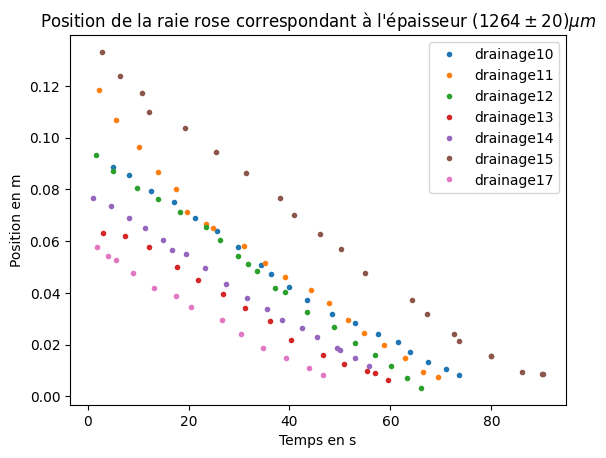

In [246]:
plt.figure()

plt.plot(tps610, pos610, '.', label='drainage10')
plt.plot(tps611, pos611, '.', label='drainage11')
plt.plot(tps612, pos612, '.', label='drainage12')
plt.plot(tps613, pos613, '.', label='drainage13')
plt.plot(tps614, pos614, '.', label='drainage14')
plt.plot(tps615, pos615, '.', label='drainage15')
plt.plot(tps617, pos617, '.', label='drainage17')
plt.xlabel('Temps en s')
plt.ylabel('Position en m')
plt.title(r"Position de la raie rose correspondant à l'épaisseur $(1264 \pm 20) \mu m$")
plt.legend()
plt.show()

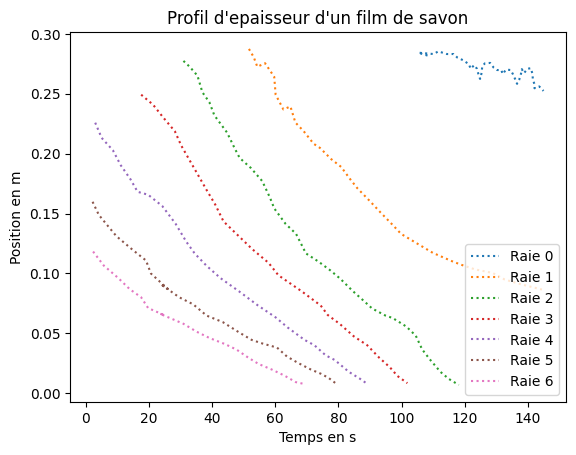

In [247]:
plt.figure()
plt.plot(tps011, pos011, ':', label='Raie 0')
plt.plot(tps111, pos111, ':', label='Raie 1')
plt.plot(tps211, pos211, ':', label='Raie 2')
plt.plot(tps311, pos311, ':', label='Raie 3')
plt.plot(tps411, pos411, ':', label='Raie 4')
plt.plot(tps511, pos511, ':', label='Raie 5')
plt.plot(tps611, pos611, ':', label='Raie 6')
plt.xlabel('Temps en s')
plt.ylabel('Position en m')
plt.title("Profil d'epaisseur d'un film de savon")
plt.legend()
plt.show()

# Analyse des données

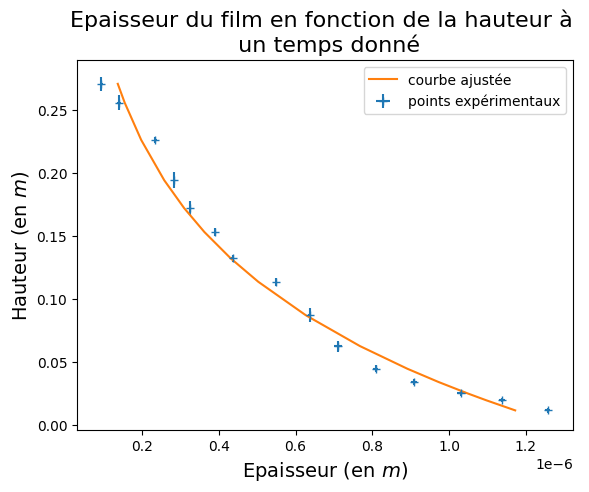

In [224]:
# Mesure profil d'epaisseur d'un film
t_posmin = np.array([26.1, 24.5, 22.2, 18.3, 16.2, 14.8, 12.7, 10.8, 7.7, 5.5, 4, 3, 2.2, 1.7, 0.8])/100
t_posmax = np.array([28, 26.6, 23, 20.5, 18.2, 15.8, 13.7, 11.9, 9.7, 7, 4.9, 3.8, 2.8, 2.2, 1.5])/100
t_epmin = np.array([86, 129, 228, 281, 320, 388, 428, 544, 629, 693, 798, 896, 1013, 1124, 1245])/1000000000
t_epmax = np.array([101, 150, 241, 285, 329, 393, 444, 553, 645, 730, 820, 922, 1052, 1152, 1270])/1000000000
t_ep = (t_epmax + t_epmin)/2 
t_pos = (t_posmax + t_posmin)/2 
t_uep = (t_epmax - t_epmin)/np.sqrt(12)
t_upos = (t_posmax - t_posmin)/np.sqrt(12)

tab_ep = np.array([12, 84, 141, 198, 236, 284, 332, 397, 445, 533, 602, 719, 817, 917, 1037, 1142, 1259, 1379])/1000000000

res, pcov = opt.curve_fit(fe, t_pos, t_ep)

plt.figure()
plt.errorbar(y=t_pos, x=t_ep, yerr=t_upos, xerr=t_uep, fmt='+', label='points expérimentaux')
plt.plot(fe(t_pos, res[0], res[1]), t_pos, label='courbe ajustée')
plt.ylabel(r'Hauteur (en $m$)', fontsize=14)
plt.xlabel(r'Epaisseur (en $m$)', fontsize=14)
plt.title('Epaisseur du film en fonction de la hauteur à \n un temps donné', fontsize=16)
plt.legend()
plt.savefig('Ep_fonc_haut')
plt.show()

In [225]:
# Ouverture des fichiers : 

# Drainage 1 :
d1 = pd.read_csv('Mesure_drain2/E01.csv')
da1 = d1.to_numpy()
tabd1 = np.array(da1[:, -2])*echtps1
res1, _ = opt.curve_fit(fe, tabd1, tab_ep[10:19], p0=[1e-6, 1e2])

# Drainage 6 :
d6 = pd.read_csv('Mesure_drain2/E06.csv')
da6 = d6.to_numpy()
tabd6 = np.array(da6[:, -2])*echtps6
res6, _ = opt.curve_fit(fe, tabd6, tab_ep[8:19], p0=[1e-6, 1e2])

# Drainage 8 :
d8 = pd.read_csv('Mesure_drain2/E08.csv')
da8 = d8.to_numpy()
tabd8 = np.array(da8[:, -2])*echtps8
res8, _ = opt.curve_fit(fe, tabd8, tab_ep[8:17], p0=[1e-6, 1e2])

# Drainage 10 :
d10 = pd.read_csv('Mesure_drain2/E010.csv')
da10 = d10.to_numpy()
tabd10 = np.array(da10[:, -2])*echtps10
res10, _ = opt.curve_fit(fe, tabd10, tab_ep[7:], p0=[1e-6, 1e2])

# Drainage 11 :
d11 = pd.read_csv('Mesure_drain2/E011.csv')
da11 = d11.to_numpy()
tabd11 = np.array(da11[:, -2])*echtps11
res11, _ = opt.curve_fit(fe, tabd11, tab_ep[6:], p0=[1e-6, 1e2])

# Drainage 12 :
d12 = pd.read_csv('Mesure_drain2/E012.csv')
da12 = d12.to_numpy()
tabd12 = np.array(da12[:, -2])*echtps12
res12, _ = opt.curve_fit(fe, tabd12, tab_ep[8:], p0=[1e-6, 1e2])

# Drainage 15 :
d15 = pd.read_csv('Mesure_drain2/E015.csv')
da15 = d15.to_numpy()
tabd15 = np.array(da15[:, -2])*echtps15
res15, _ = opt.curve_fit(fe, tabd15, tab_ep[9:], p0=[1e-6, 1e2])

# Drainage 17 :
d17 = pd.read_csv('Mesure_drain2/E017.csv')
da17 = d17.to_numpy()
tabd17 = np.array(da17[:, -2])*echtps17
res17, _ = opt.curve_fit(fe, tabd17, tab_ep[3:], p0=[1e-6, 1e2])

# Mesure de l'epaisseur en fonction de la hauteur à plusieurs temps
dfD10 = pd.read_csv('Mesure_drain2/ResultsD10b.csv')
arrayD10 = dfD10.to_numpy()
pos10 = arrayD10[:, -1]*echpos10
tps10 = arrayD10[:, -2]
tab10 = sep(pos10, tps10, 0.15)

# Bouble pour les ajustements non linéaires pour drainage 10
tab_tD10 = tab10[0]
tabtps10 = []
for i in range(0, len(tab10[1])):
    tabtps10.append(np.mean(tab10[1][i])*echtps10)

# Numero des premières raies
tabcol10b = np.array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 3,3,4, 5, 6, 7, 7, 8, 9, 9, 10, 10])

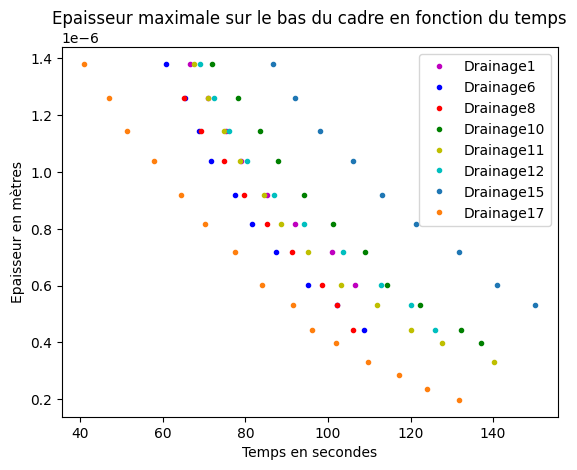

In [226]:
z = np.arange(40, 140, 0.01)

plt.figure()
plt.plot(tabd1, tab_ep[10:19], '.m', label='Drainage1')
#plt.plot(z, fe(z, res1[0], res1[1]), '-m', label='Théo 1')
plt.plot(tabd6, tab_ep[8:19], '.b', label='Drainage6')
#plt.plot(z, fe(z, res6[0], res6[1]), '-b', label='Théo 6')
plt.plot(tabd8, tab_ep[8:17], '.r', label='Drainage8')
#plt.plot(z, fe(z, res8[0], res8[1]), '-r', label='Théo 8')
plt.plot(tabd10, tab_ep[7:], '.g', label='Drainage10')
#plt.plot(z, fe(z, res10[0], res10[1]), '-g', label='Théo 10')
plt.plot(tabd11, tab_ep[6:], '.y', label='Drainage11')
#plt.plot(z, fe(z, res11[0], res11[1],), '-y', label='Théo 11')
plt.plot(tabd12, tab_ep[8:], '.c', label='Drainage12')
#plt.plot(z, fe(z, res12[0], res12[1]), '-c', label='Théo 12')
plt.plot(tabd15, tab_ep[9:], '.', label='Drainage15')
#plt.plot(z, fe(z, res15[0], res15[1]), color='orange', label='Théo 15')
plt.plot(tabd17, tab_ep[3:], '.', label='Drainage17')
#plt.plot(z, fe(z, res17[0], res17[1]), color='gold', label='Théo 17')
plt.xlabel('Temps en secondes')
plt.ylabel('Epaisseur en mètres')
plt.title('Epaisseur maximale sur le bas du cadre en fonction du temps')
plt.legend()
plt.show()

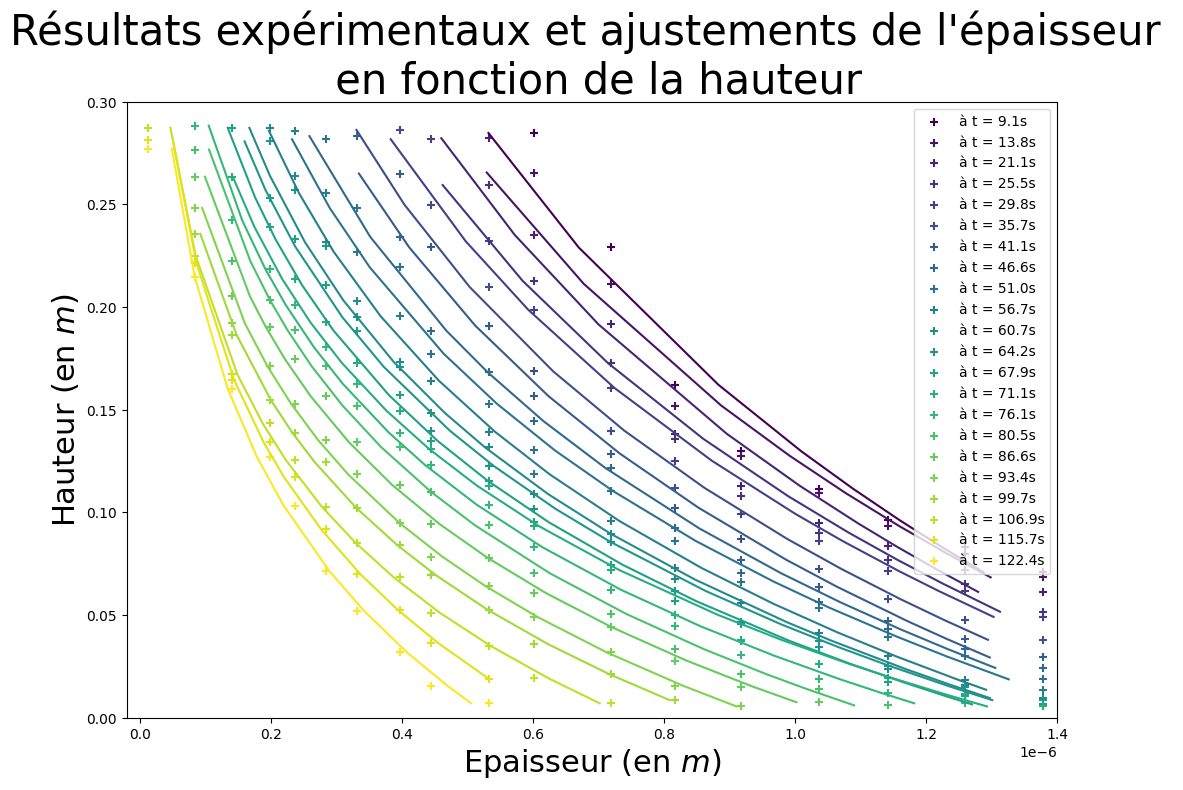

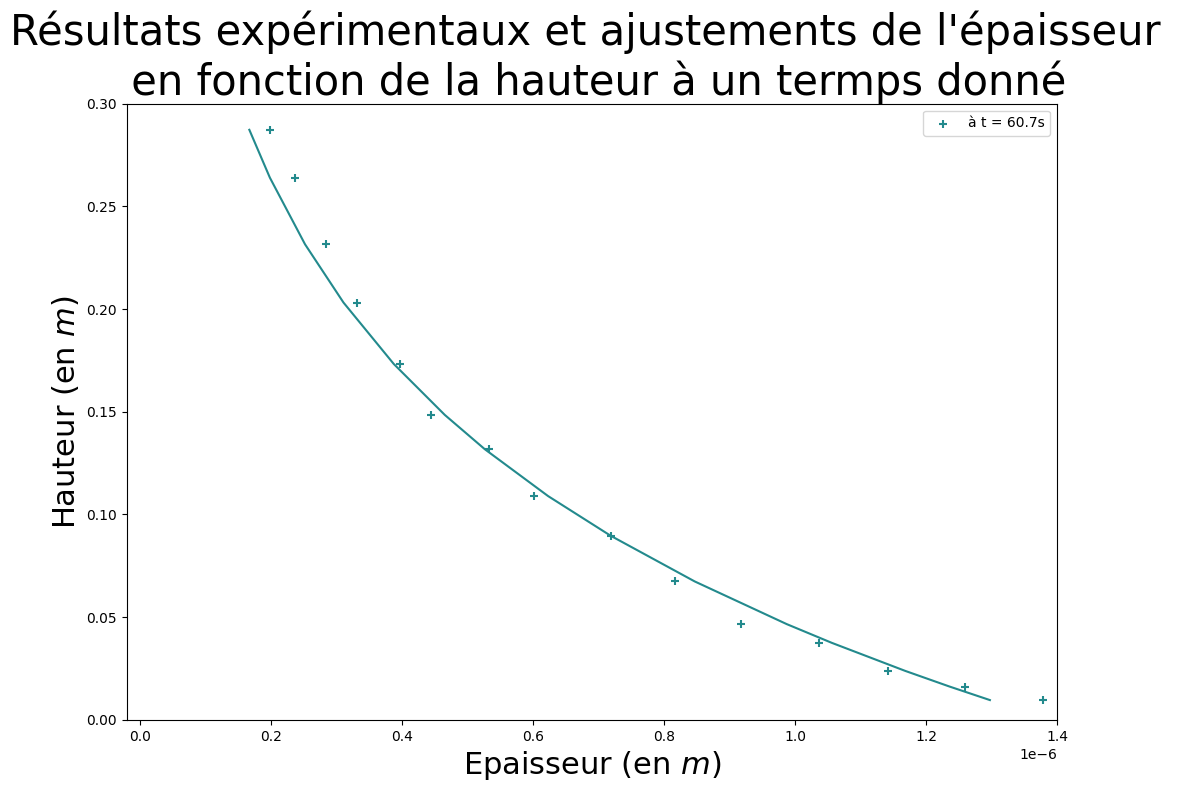

In [283]:
def exp_decreasing(x, a, b):
    return a * np.exp(-x / b)

params = []
covariances = []
y_fits = []

tab_a2 = []
tab_b2 = []

for i in range(len(tab_tD10)):
    rai1 = tabcol10b[i]
    p, _ = curve_fit(exp_decreasing, tab_tD10[i], tab_ep[rai1:len(tab_tD10[i])+rai1], p0 =[1e-7, 100*echpos10])
    params.append(p)
    tab_a2.append(p[0])
    tab_b2.append(p[1])

max_datasets = min(22, len(tab_tD10))

colors = plt.cm.viridis(np.linspace(0, 1, max_datasets))

tabcol10bt = tabcol10b[::-1]
tab_ept = tab_ep[::-1]
tab_tD10t = tab_tD10[::-1]
paramst = params[::-1]
tabtps10t = tabtps10[::-1]

plt.figure(figsize=(12, 8))
for i in range(max_datasets):
    rai1 = tabcol10bt[i]
    plt.scatter(
        tab_ep[rai1:len(tab_tD10t[i])+rai1], 
        tab_tD10t[i], 
        marker='+',
        label=f'à t = {tabtps10t[i]:.1f}s',        color=colors[i])
    plt.plot(
        exp_decreasing(np.array(tab_tD10t[i]), *paramst[i]), 
        tab_tD10t[i],  
        color=colors[i])
    


# Ajouter des labels, une légende et un titre
plt.xlabel(r'Epaisseur (en $m$)', fontsize=22)
plt.ylabel(r'Hauteur (en $m$)', fontsize=22)
plt.title("Résultats expérimentaux et ajustements de l'épaisseur \n en fonction de la hauteur", fontsize=30)
plt.xlim(-0.02e-6, 1.4e-6)
plt.ylim(0, 0.30)
plt.legend()
plt.savefig('Ep_haut_dift')
plt.show()

i = 10
rai1 = tabcol10bt[i]
plt.figure(figsize=(12, 8))
plt.scatter(tab_ep[rai1:len(tab_tD10t[i])+rai1], tab_tD10t[i], marker='+',label=f'à t = {tabtps10t[i]:.1f}s',color=colors[i])
plt.plot(exp_decreasing(np.array(tab_tD10t[i]), *paramst[i]), tab_tD10t[i],  color=colors[i])
plt.xlabel(r'Epaisseur (en $m$)', fontsize=22)
plt.ylabel(r'Hauteur (en $m$)', fontsize=22)
plt.title("Résultats expérimentaux et ajustements de l'épaisseur \n en fonction de la hauteur à un termps donné", fontsize=30)
plt.xlim(-0.02e-6, 1.4e-6)
plt.ylim(0, 0.30)
plt.legend()
plt.savefig('Ep_haut_dift2')
plt.show()

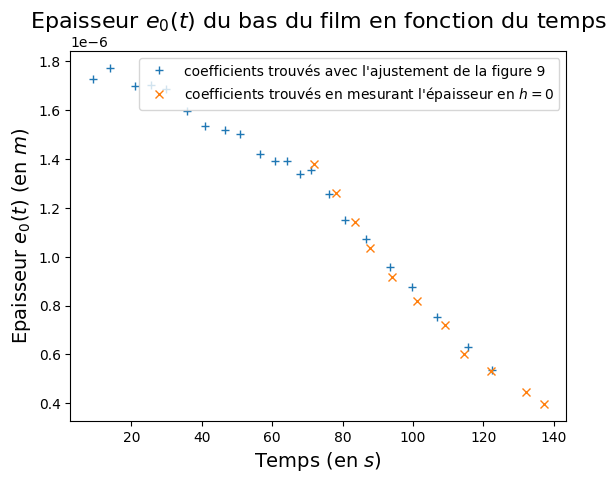

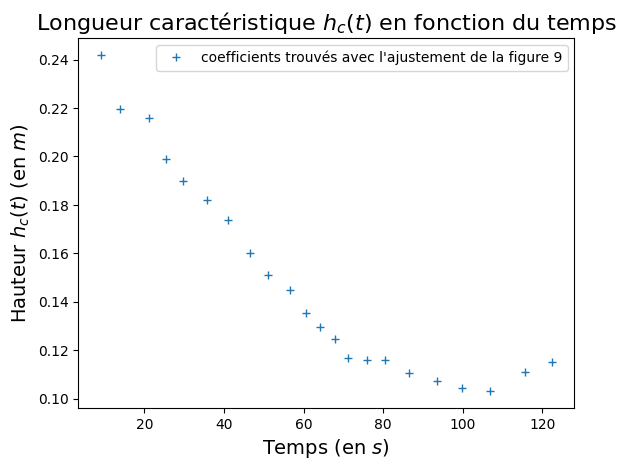

In [228]:
d10 = pd.read_csv('Mesure_drain2/E010.csv')
da10 = d10.to_numpy()
tabd10 = np.array(da10[:, -2])*echtps10

plt.figure()
plt.plot(tabtps10, tab_a2,"+", label="coefficients trouvés avec l'ajustement de la figure 9")
plt.plot(tabd10, tab_ep[7:], 'x', label=r"coefficients trouvés en mesurant l'épaisseur en $h=0$")
#plt.ylim(0, 1.2e-6)
plt.title(r"Epaisseur $e_0(t)$ du bas du film en fonction du temps", fontsize=16)
plt.xlabel(r'Temps (en $s$)', fontsize=14)
plt.ylabel(r'Epaisseur $e_0(t)$ (en $m$)', fontsize=14)
plt.legend()
plt.savefig('coef_a')
plt.show()

plt.figure()
plt.plot(tabtps10, tab_b2,"+", label="coefficients trouvés avec l'ajustement de la figure 9")
#plt.ylim(0, 0.115)
plt.title(r'Longueur caractéristique $h_c(t)$ en fonction du temps', fontsize=16)
plt.xlabel(r'Temps (en $s$)', fontsize=14)
plt.ylabel(r'Hauteur $h_c(t)$ (en $m$)', fontsize=14)
plt.legend()
plt.savefig('coef_b')
plt.show()

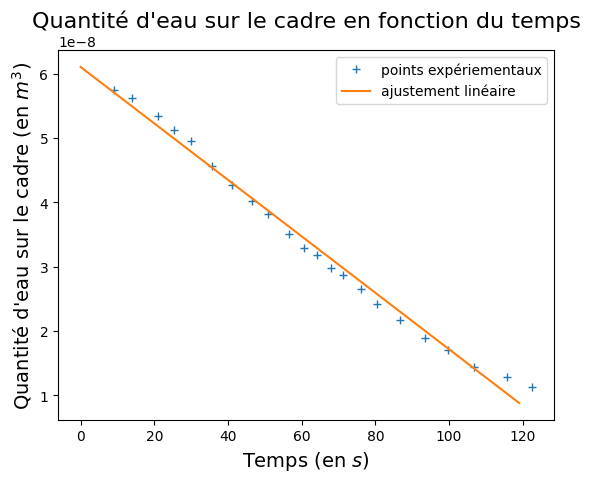

In [229]:
tab_a2t = np.array(tab_a2)
tab_b2t = np.array(tab_b2)

x_max = 0.286
u_x_max = 0.026
Qt = tab_a2t*tab_b2t*(1-np.exp(-x_max/tab_b2t))*0.1985
res = fu.linfitxy(tabtps10, Qt)
z=np.arange(0,120)
plt.figure()
plt.plot(tabtps10, Qt,"+",label="points expériementaux")
plt.plot(z,z*res[0]+res[1],label="ajustement linéaire")
plt.xlabel(r'Temps (en $s$)',fontsize=14)
plt.ylabel(r"Quantité d'eau sur le cadre (en $m^3$)",fontsize=14)
plt.title(r"Quantité d'eau sur le cadre en fonction du temps",fontsize=16)
plt.legend()
plt.savefig('quant_eau')
plt.show()